

## **GEOPHYS 310 and Adv. Lab 316 Ray Tracing lab**

In this lab, we will explore how ray tracing can be used to model the propagation of seismic energy through the earth. Using this theory, we will determine the epicentral distance and T0 time for an earthquake recorded in New Zealand.

Chapter 11 of [A Guided Tour of Mathematical Methods for the Physical Sciences](http://www.cambridge.org/nz/academic/subjects/physics/mathematical-methods/guided-tour-mathematical-methods-physical-sciences-3rd-edition#W7jZxE54KWWuUWEC.97), *Scale Analysis*, discusses the conditions where waves can be considered in terms of ray theory. It turns out, this is not a bad approximation when the spatial variability in the physical parameters that define the wave propagation is large compared to the propagating wavelengths. Then, the Eikonal equation describes the travel time $T$ for a ray in a medium with wave speed $v({\bf r})$ as $$ |\nabla T({\bf r})|^2 = 1/v({\bf r})^2.$$ 
This describes how the gradient of the travel time $T$ of a ray depends on the (local) velocity. In our book you can read how to derive [Snell's Law](https://en.wikipedia.org/wiki/Snell%27s_law) from the Eikonal equation, for example. 

There are many strategies -- under the umbrella of "ray tracing"  -- to find the travel time of rays in media with arbitrary velocity distributions, but here we will explore the travel time and ray path of seismic waves in a spherically symmetric approximation of Earth.

### **Rays in a spherically symmetric Earth**
Having accepted ray theory in the Earth for high-frequency seismic waves, we can estimate the travel time $T$ and epicentral distance $\Delta$ of "seismic rays." To first order, the Earth is spherically symmetric, greatly simplifying ray propagation. In a spherically symmetric velocity model $v({\bf r})= v(r)$: 

![Figure 1](https://auckland.figshare.com/ndownloader/files/14738099)

First, a small part of the ray path $ds$ satisfies Pythagoras' Rule: $ds^2 = dr^2 + (rd\Delta)^2$. Secondly, The take-off angle $\sin i = rd\Delta/ds$. Thirdly, Snell's Law in a spherically symmetric Earth is $p = r\sin (i) /v$. This $p$ is the (constant) ray parameter. 

#### **Question 1**
Combining these three expressions, show that

$$ \frac{ds}{dr} = \frac{r}{\sqrt{r^2-(pv)^2}} \ \ \ \ \ \mbox{and}   \ \ \ \ \ \ \frac{d\Delta}{dr} = \frac{pv/r}{\sqrt{r^2-(pv)^2}}.$$
To find the total ray path length $s$ and the epicentral distance $\Delta$, we integrate these expressions with regards to $r$.


### **Time and distance of a ray**
Let's consider a ray that starts and ends at the surface, and travels an epicentral distance $\Delta$:
![Figure 2](https://auckland.figshare.com/ndownloader/files/14754827)

Then, we take advantage of the symmetry, by integrating twice from the point of maximum depth of the ray $r=r_0$ to the surface $r= R$:
$$
\Delta(p) = 2 \int_{r_0}^R \frac{pv/r} {\sqrt{r^2-(pv)^2}}dr.
$$ 

The travel time requires integration of $\frac{1}{v}\frac{ds}{dr}$ over $r$, so that:
$$
T(p) = 2 \int_{r_0}^R \frac{r/v} {\sqrt{r^2-(pv)^2}}dr.
$$
These equations could have also been derived directly from the Eikonal equation and the equation of kinematic ray tracing (see Aki and Richards, for example).


### **Rays in a sphere with constant speed**
In his book *Principles of Seismology*, Udias derives expressions for travel time and epicentral distance directly for the special case of a sphere with radius $R$ and a constant speed: $v(r) =c$. In this simplest of cases, the rays don't bend: 

![Figure 3](https://auckland.figshare.com/ndownloader/files/14777435)

and the 
$$
T(p) = \frac{2}{c}\sqrt{R^2-p^2c^2}
$$
and
$$
\Delta(p) = 2\cos^{-1}\left(\frac{pc}{R}\right).
$$

####  **Question 2**
Convince yourself of Udias' results by differentiating the expressions for $T$ and $\Delta$ with respect to $r$ to confirm the integrands for the general expressions of $T(p)$ and $\Delta(p)$ stated earlier.

Alternatively, we can compare the analytic solution and the intregral solution with a numerical approximation.

#### **Question 3**
In the code cell below, the numerical solution for the integral of travel time for a homogeneous Earth with wavespeed $c$ has been given. Evaluate the numerical solution for the epicentral distance and the analytical solutions for both travel time and epicentral distance. Create two plots comparing the analytical and numerical solutions for both epicentral distance and travel time as a function of take-off angle.

In [22]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt

# integrand for the travel time:
def t_integrand(r, c, p):
    return (2*r/c)/np.sqrt(r**2-(c*p)**2)

c = 8 # km/s
R = 6371 # radius in km

t= [] # travel times
d = [] # for your epicentral distances
t_udias = [] # for your theoretical values of t
d_udias = [] # for your theoretical values of d
angles = np.linspace(0.01,0.99*np.pi/2,100) # (almost) all angles, just avoiding some singularities

for angle in angles:
    p = R*np.sin(angle)/c
    t.append(quad(t_integrand, p*c, R, args=(c,p))[0])
    # Add theoretical solution:
    t_udias.append(

# now do the same for the numerical and theoretical epicentral distance as a function of take-off angle:

#### **Question 4**

Now make a plot of travel time as a function of epicentral distance.

In [ ]:
#Plot of travel time as a function of epicentral distance


This plot is not quite linear, because the speed is constant, but the epicentral distance is an arc. But how about plotting travel time $T$ as a function of ray length $s$, using the sine rule $$\frac{s}{\sin(\Delta)} = \frac{R}{\sin\left(i\right)} = \frac{R}{\sin\left(\frac{\pi-\Delta}{2}\right)},$$
because:

![Figure 4](https://auckland.figshare.com/ndownloader/files/14777429)

#### **Question 5**

Adjust your code from the previous question to make the plot linear.

In [ ]:
# Make the plot linear in this cell block

Now we observe -- as expected -- that for a sphere with a constant wave speed, the travel time is linear with the length of the ray! 

#### **Question 6**
So far, we did not discuss the kind of waves that have these rays. In the Earth, we generally have two kinds of waves that travel through the volume: P- and S-waves. Your task: discuss the polarization of these two. Why are they called P- and S-wave? Hint: the equations for the P- and S-wave speeds hold the key to answering this question. Quote them in your report and discuss the three parameters in these definitions (assuming an isotropic medium).

## **PREM**

In the Earth, the seismic wave speed varies with depth. For example, there is a sudden drop in wave speed (due to a phase change) from the outer to the inner core. More realistic P- and S-wave speeds as a function of the depth, based on seismic observations, are captured in the [Preliminary Reference Earth Model (PREM)](https://en.wikipedia.org/wiki/Preliminary_reference_Earth_model):

In [ ]:
import pandas as pd

url = "http://ds.iris.edu/files/products/emc/data/PREM/PREM_ANISOTROPIC.csv"
c = pd.read_csv(url, usecols=[0,2,3], names=['radius', 'vP','vS'], header=None)
vp = np.array(c['vP'])/1000
vs = np.array(c['vS'])/1000
r = np.array(c['radius'])/1000
plt.plot(r,vp,label='Vp')
plt.plot(r,vs,label='Vs')
plt.xlabel('radius r (km)')
plt.ylabel('speed v (km/s)')
plt.legend()
plt.show()

Let's estimate the P-wave travel time as a function of epicentral distance based on this $v_p(r)$ and the integrals presented at the start of this notebook. But first, we must interpolate the PREM-supplied $v_p(r)$ to get a regularly spaced 1D array.

#### **Question 7**
Use the `scipy.interpolate.interp1d` function to obtain an array of velocities at 1 km spacings of radius. Plot the interpolated line with the original $r$ and $v_p$ values from above, and include a legend.

In [ ]:
# Write your code in this cell block:
from scipy.interpolate import interp1d


We'll evaluate the integrals by taking [Riemann sums](https://en.wikipedia.org/wiki/Riemann_sum) of the PREM velocity model for the (regular) $v_p(r)$. Below, you integrating from R to 0, where 0 is related to the point of maximum depth and R is at the surface. IMPORTANT: the code below runs as is, IF you renamed $v_p$ and $r$ to the regular interpolated values of the original v and r that were read in from the PREM model.

In [ ]:
dr = r[1]-r[0]
angles = np.linspace(0.95*np.pi/2,0.05,400) # defining a range of take off angles. Numerical instablities near 0 and 90 degrees need to be avoided.
Tp = []
Deltap = []
    
for angle in angles:
    p = r[-1]*np.sin(angle)/vp[-1] # constant ray parameter for each take-off angle
    T = 0
    Delta = 0
    for i in range(len(r)-1,0,-1):
        if (p*vp[i])< r[i]: # consider the ray from the surface until it turns
            denom = np.sqrt(r[i]**2- (p*vp[i])**2)
            T = T + 2*dr*r[i]/vp[i]/denom
            Delta = Delta + 2*dr*p*vp[i]/r[i]/denom
        else:
            break
    Tp.append(T)
    Deltap.append(Delta)
        
plt.figure()
plt.scatter(180*np.array(Deltap)/np.pi,np.array(Tp)/60, s=20)
plt.xlabel('epicentral distance (degrees)')
plt.ylabel('travel time (minutes)')
plt.show()

These estimates are not too bad, but as always: the devil is in the details. Our interpolation has smoothed out some important detail in the velocity model that is responsible for the (correct) P-wave [shadow zone](https://en.wikipedia.org/wiki/Shadow_zone), for example. More sophisticated schemes to estimate travel times for seismic arrivals are explored in the second part of this lab, where we use readily written code based on the (delay-time $\tau$, ray parameter $p$)-domain, originally proposed by Buland and Chapman (1983), coded up in the [Taup toolkit](https://www.seis.sc.edu/taup/), and then wrapped in [ObsPy](https://github.com/obspy/obspy/wiki).

# **Tracing your own seismic ray paths through the Earth**

The software we use for ray tracing in the Earth is called [“TauP”](https://pubs.geoscienceworld.org/ssa/srl/article/70/2/154/142385/the-taup-toolkit-flexible-seismic-travel-time-and). Information about the package, including the manual can be downloaded [here](http://www.seis.sc.edu/TauP/). This code should run in the notebook on Colab, but you are welcome to run the code locally on a lab computer or laptop. First, let's install and import the required libraries (this may take a minute or two on Colab): 

In [ ]:
# Run the following line only on Colab
!pip install obspy

You could run TauP standalone, but [obspy](https://docs.obspy.org/) provides a Python class called
Taup, which comes with a function [plot_ray_paths](https://docs.obspy.org/packages/autogen/obspy.taup.tau.plot_ray_paths.html#obspy.taup.tau.plot_ray_paths).

This function can be used like this:

In [ ]:
from obspy.taup.tau import plot_ray_paths
plot_ray_paths(source_depth=100,phase_list=['P'],npoints=25)

#### **Question 8**
Plot S- and P- wave arrivals from 0 to 360 degrees. Why are there gaps (shadows) in the arrivals?

In [ ]:
# Write your code here

Besides your plain P- and S-wave phases, there are a host of other — more complicated — seismic ray paths from earthquake to receiver. [This link](http://www.iris.edu/data/vocab.htm) describes the naming conventions.

#### **Question 9**

Plot the PKP arrivals and P-wave arrivals from 0–360 degrees. If we consider PKP a direct compressional arrival, what is the range of the P-wave shadow zone?

In [ ]:
# Write code here

#### **Question 10**

Explain with a figure and text why P-waves at smaller epicentral distances (0–35 degrees) appear to cross. To zoom in on the ray paths at smaller epicentral distance, use the option to plot ray paths in a Cartesian coordinate system. *Confirm the same occurs for S-waves*.

In [ ]:
# Write code here

# **The travel times of seismic rays**

The previous tasks involved mainly the spatial distribution of seismic ray paths in the earth. One of the simplest examples of using obspy is to create a travel time plot of different seismic phases. For example, if you execute the following three lines of code, the direct S-wave arrival time as a function of epicentral distance appears:

In [ ]:
from obspy.taup import plot_travel_times
plot_travel_times(source_depth=10, phase_list=["S"])

#### **Question 11**

Draw a single plot that contains the travel-time curves for P, S, SS, and PP arrivals at 100 points between 0 and 90 degrees epicentral distance.

In [ ]:
# Write code here

# **Earthquake location estimation from seismograms**

The previous analyses were based on models where the elastic properties only vary in the radial direction; in other words, the assumption was made that the Earth has *spherical symmetry*. In the remainder of this lab, we will see that this assumption is good enough to find the epicentral distance of earthquakes, based on measurements (seismograms) at a single location. We will use a some python Modules that are installed in the advanced lab, but if you are running this elsewhere, you may have to install them:

In [ ]:
# Run this cell if using Colab
!pip install cartopy
!pip uninstall -y shapely
!pip install shapely --no-binary shapely

The following code plots the SNZO seismogram of an earthquake in obspy:

<Figure size 720x720 with 0 Axes>

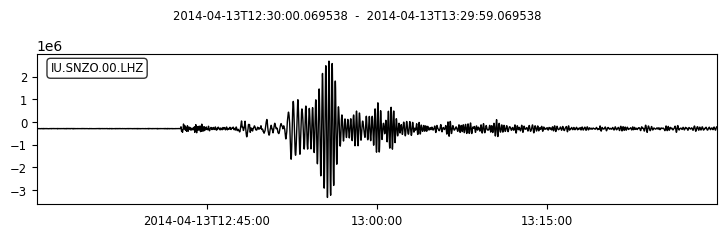

In [26]:
from obspy import read
from obspy.clients.fdsn import Client
from obspy.core import UTCDateTime

client = Client("IRIS")
t1 = UTCDateTime('2014-04-13T12:30:00.00')
t2 = t1 + 3600
st = client.get_waveforms("IU", "SNZO", "00", "LHZ", t1, t2)  #in later parts, you can ex-change SNZO.
plt.figure()
st.plot()
plt.show()

#### **Question 12**
Zoom in on the part of the graph that you think contains the important body wave arrivals. If you are using jupyter, you can just zoom in on the graph, but in colab you cannot. In that case, use the [trim function](https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.trim.html). Identify the arrival time of the P, S, SS, and PP arrival. Your earlier work determines the order of these arrivals. By the way, the largest amplitudes in the seismogram are due to surface waves. Set markers on these arrivals with the following example of axvline:

In [ ]:
example_arrival = UTCDateTime('2014-04-13T12:56:55.797438Z')
fig = plt.figure()
st.plot(fig=fig)
ax = fig.gca()
ax.axvline(x=example_arrival.datetime, label='Arrival', color='blue')
plt.show()

#### **Question 13**

Calculate the delay times between the four arrivals. Using these times, estimate with your arrival time graph from the previous section the epicentral distance of this earthquake $\Delta$, and the origin time of this earthquake `T0`.

#### **Question 14**

Overlay your data with the predicted arrival times of the four phases (your plot from Question 10), based on your estimates of $T0$ and $\Delta$. Adjust your initial estimates until you are happy with the match between the predictions and observed travel times of the four arrivals.

In [ ]:
# Write code here

#### **Question 15**
Plot a circle with a radius equal to the epicentral distance from SNZO on a world map using this example code:

In [ ]:
# Uncomment the next three lines if you run this on Colab:
#!pip install cartopy
#!pip uninstall -y shapely
#!pip install shapely --no-binary shapely

/home/kvan637/miniconda3/envs/obspy/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


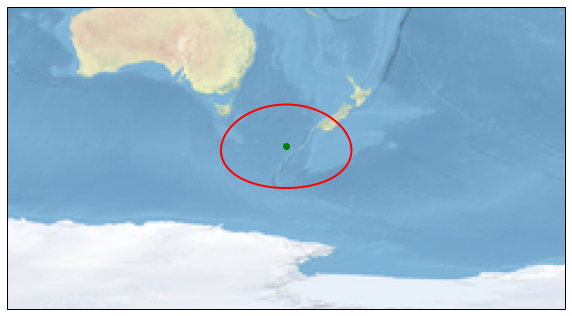

In [27]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.geodesic import Geodesic
import shapely

# compute points on a circle on the Earth, centered on (lon,lat): 
lon= 160 
lat= -50
# a map:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent([100,220,-20,-80])
ax.stock_img()

# create a polygon of points on a circle:
circle_points = Geodesic().circle(lon=lon, lat=lat, radius= 1000000, n_samples=100, endpoint=False) 
geom = shapely.geometry.Polygon(circle_points) 

# add the polygon to the map with the proper projection: 
ax.add_geometries((geom,), crs=ccrs.PlateCarree(), facecolor='None' , edgecolor='red', linewidth=2)
plt.plot(lon,lat,marker='o',color='green',transform=ccrs.Geodetic())
plt.show()

#### **Question 16**
Use the code to download data for station SNZO to get two more seismograms from different stations. Then repeat steps 12-15 two draw two further circles on your map. [This page](https://www.fdsn.org/networks/detail/IU/) contains a map with all the different stations you could use and their corresponding station codes.

In [ ]:
# Write code here

#### **Question 17**
Use your estimate of the origin time `T0` and the epicentre to find the most likely candidate for this earthquake in an earthquake catalogue, and add this earthquake to your map to see how close your estimate is to that of the professionals. You may have to make a new map that zooms in around the epicentre to judge your results.  

In [ ]:
# Write code here